In [16]:
import cv2,os,sys
import matplotlib.pyplot as plt
from skimage.feature import hog
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


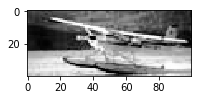

In [13]:
img=cv2.imread('TrainImages/neg-0.pgm',0)
plt.subplot(2, 3, 1)
plt.imshow(img.astype('uint8'))
#plt.gca().axis('off')

In [17]:
class DPM:
    
    def __init__(
            self,
            step_x=4,
            step_y=2,
            pix_per_cell_root=8,
            cells_per_block_root=2,
            pix_per_cell_part=4,
            cells_per_block_part=2,
            parts_count=4,
            part_w=30,
            part_h=20):
        """
        Here we initilize some important parts of the the algorithm

        step_x --- our step (x direction) in sliding window

        """

        self.image_h = 22  # 14 - 36
        self.image_w = 90  # 5 - 95
        self.step_x = step_x
        self.step_y = step_y

        # HOG configuration
        self.pix_per_cell_root = pix_per_cell_root
        self.cells_per_block_root = cells_per_block_root

        self.pix_per_cell_part = pix_per_cell_part
        self.cells_per_block_part = cells_per_block_part

        self.parts_count = parts_count

        # partfilter size
        self.part_w = part_w
        self.part_h = part_h

        self.filters = []

        self.importance_treshold = 1e-4
        self.importance_features = []
        self.importance_features_bool = []
    def process_frame(self, im, tres_main, tres_nomain):
        nmb = 0
        summ_cost = 0
        pix_per_cell = 8
        cells_per_bl = 2
        pix_per_cell_1 = 4
        cells_per_bl_1 = 2
        root_feature = hog(np.asarray(im), orientations=9, pixels_per_cell=(pix_per_cell, pix_per_cell),
                           cells_per_block=(cells_per_bl, cells_per_bl))
        main_filter = False
        if self.clfs[nmb].predict([root_feature]) == '1':
            print('main filter')
            summ_cost += 0.5
            main_filter = True
        nmb += 1
        best_coord = self.process_filter_image(im)
        for key in best_coord.keys():
            print(best_coord[key], ' ', key)
            filter_cost = self.get_filters_cost(best_coord[key], key)
            cost = 1.0 / (1 + filter_cost)
            print('key: ', key, ' cost: ', cost)
            summ_cost += cost
        print('summ_cost ', summ_cost)